<a href="https://colab.research.google.com/github/ChrisBerggren/cosc470s24/blob/main/LabThreeImpactOfRegularizationAnd_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kartoone/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/nn


In [ ]:
# ***Part 1-Introduce Regularization
from network2 import Network, CrossEntropyCost
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper ()
training_data = list(training_data)
test_data = list(test_data) [0:3]

# Without Any Regularization
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
weights = net.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

# With Regularization
net2 = Network([784, 30, 10], cost=CrossEntropyCost)
net2.large_weight_initializer()
weights2 = net2.SGD(training_data, 30, 10, 0.5, lmbda=0.1, evaluation_data=test_data, monitor_evaluation_accuracy=True)



Epoch 0 training complete
Appending weights for epoch 0
Accuracy on evaluation data: 3 / 3
Epoch 1 training complete
Appending weights for epoch 1
Accuracy on evaluation data: 3 / 3
Epoch 2 training complete
Appending weights for epoch 2
Accuracy on evaluation data: 3 / 3
Epoch 3 training complete
Appending weights for epoch 3
Accuracy on evaluation data: 3 / 3
Epoch 4 training complete
Appending weights for epoch 4
Accuracy on evaluation data: 3 / 3
Epoch 5 training complete
Appending weights for epoch 5
Accuracy on evaluation data: 3 / 3
Epoch 6 training complete
Appending weights for epoch 6
Accuracy on evaluation data: 3 / 3
Epoch 7 training complete
Appending weights for epoch 7
Accuracy on evaluation data: 3 / 3
Epoch 8 training complete
Appending weights for epoch 8
Accuracy on evaluation data: 3 / 3
Epoch 9 training complete
Appending weights for epoch 9
Accuracy on evaluation data: 3 / 3
Epoch 10 training complete
Appending weights for epoch 10
Accuracy on evaluation data: 3 /

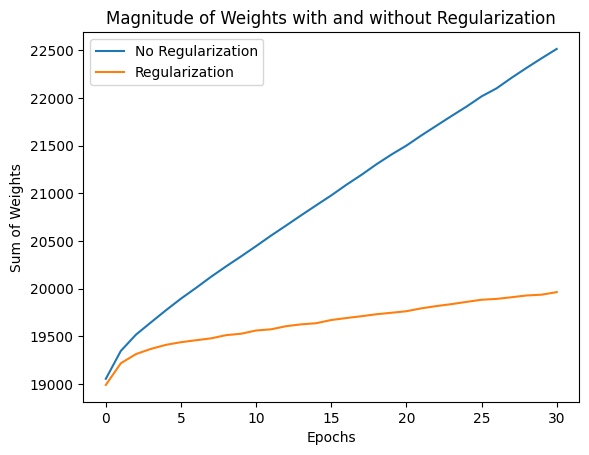

In [ ]:
# Plot the magnitude of the sum of weights after each epoch
import matplotlib.pyplot as plt

def getweightsum(epoch_weights):
  total_weights = []
  # Gets the weights for each epoch for first network
  for epoch_weight in epoch_weights:
    # Add the manitude of each weight for first layer
    l1mag = 0
    for l1 in epoch_weight[0]:
      for l1weight in l1:
        l1mag += abs(l1weight)

    # Add the manitude of each weight for second layer
    l2mag = 0
    for l2 in epoch_weight[1]:
      for l2weight in l2:
        l2mag += abs(l2weight)

    total_weights.append(l1mag + l2mag)

  return total_weights

epoch_weights = weights[4]
epoch_weights2 = weights2[4]
no_reg_weights = getweightsum(epoch_weights)
reg_weights = getweightsum(epoch_weights2)


plt.plot(no_reg_weights, label="No Regularization")
plt.plot(reg_weights, label="Regularization")
plt.title('Magnitude of Weights with and without Regularization')
plt.ylabel('Sum of Weights')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Part 2 - Normalization and Handwritten Digit
from PIL import Image

# Function to test how many images of a category the network gets correct
def testing(fileprefix):
  base_path = 'new_images/'
  accuracy = [0] * 10
  print(f'Testing {fileprefix} images:')
  correct_str = 'Numbers correctly identified: '
  incorrect_str = 'Numbers incorrectly identified: '
  for i in range(10):
    image_path = base_path + fileprefix + str(i) + '.png'
    image = Image.open(image_path)

    # Convert the image to array
    image_array = np.array(image)/255.0

    # Test image
    result = np.argmax(net2.feedforward(np.reshape(image_array, (784,1))))
    if result == i:
      accuracy[i] = 1
      correct_str += str(i) + ' '
    else:
      incorrect_str += str(i) + ' '
  print(correct_str)
  print(incorrect_str)
  print()
  return accuracy

# Test how many the network gets correct
# Accuracy will be stored in 3 arrays
good_accuracy = testing('good')
large_accuracy = testing('large')
small_accuracy = testing('small')

# Chart the accuracy for each
x = np.array(['Good','Large','Small'])
y = np.array([sum(good_accuracy), sum(large_accuracy), sum(small_accuracy)])
plt.bar(x,y)
plt.title('Accuracy for Handwritten Digits')
plt.ylabel('Accuracy')
plt.xlabel('Number correct')
plt.show()

Testing good images:


FileNotFoundError: [Errno 2] No such file or directory: 'new_images/good0.png'

In [ ]:
# ***Part 3 - Increased number of training images
# Expand the number of images
import expand_mnist
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper("mnist_expanded.pkl.gz")
training_data=list(training_data)
test_data = list(test_data)
print(len(training_data))

In [ ]:
# Retrain the network
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
weights = net.SGD(training_data, 30, 10, 0.5, lmbda=0.1, evaluation_data=test_data, monitor_evaluation_accuracy=True)

In [ ]:
# Function to test how many images of a category the network gets correct
def testing(fileprefix):
  base_path = 'new_images/'
  accuracy = [0] * 10
  print(f'Testing {fileprefix} images:')
  correct_str = 'Numbers correctly identified: '
  incorrect_str = 'Numbers incorrectly identified: '
  for i in range(10):
    image_path = base_path + fileprefix + str(i) + '.png'
    image = Image.open(image_path)

    # Convert the image to a array
    image_array = np.array(image)/255.0

    # Test image
    result = np.argmax(net.feedforward(np.reshape(image_array, (784,1))))
    if result == i:
      accuracy[i] = 1
      correct_str += str(i) + ' '
    else:
      incorrect_str += str(i) + ' '
  print(correct_str)
  print(incorrect_str)
  print()
  return accuracy

# Test how amount (value) network gets correct
# Accuracy will be stored in 3 arrays
good_accuracy = testing('good')
large_accuracy = testing('large')
small_accuracy = testing('small')

# Chart the accuracy for each array
x = np.array(['Good','Large','Small'])
y = np.array([sum(good_accuracy), sum(large_accuracy), sum(small_accuracy)])
plt.bar(x,y)
plt.title('Accuracy for Handwritten Digits')
plt.ylabel('Accuracy')
plt.xlabel('Number correct')
plt.show()